# Understanding our data

In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv('sales.csv')

In [3]:
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [4]:
sales.drop(columns=('Unnamed: 0'),axis=1, inplace = True)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 44.0+ MB


In [6]:
# We saw that we need to transform our features to their correct type

sales['open'] = sales['open'].astype(int)
sales['promotion'] = sales['promotion'].astype(int)
sales['school_holiday'] = sales['school_holiday'].astype(int)

sales['store_ID'] = sales['store_ID'].astype(object)
sales['day_of_week'] = sales['day_of_week'].astype(object)

In [7]:
# StateHoliday indicates a state holiday. Normally all stores, with few exceptions,
# are closed on state holidays. Note that all schools are closed on public holidays and weekends.
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None

# As we saw that it doesn't matter much what tipe orf holiday it is, we will creat a boolean column just to state
# if it is or not a holiday

sales['state_holiday'] = sales['state_holiday'].replace('a',1).replace('b',1).replace('c',1)
sales['state_holiday'] = sales['state_holiday'].astype(int)

In [8]:
# We need to correct our date feature to a numerical value in order to be able to process it
sales_date_num = sales.copy()

from datetime import datetime

def date_to_ordinal(date):
    return datetime.strptime(date, '%Y-%m-%d').toordinal()

sales_date_num['date'] = sales_date_num['date'].apply(date_to_ordinal)

In [9]:
sales_date_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  object
 1   day_of_week          640840 non-null  object
 2   date                 640840 non-null  int64 
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  int64 
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 44.0+ MB


/var/folders/zl/64_yxwls4ld4zjxrnk6t2yth0000gn/T/ipykernel_1488/4267753965.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(sales_date_num.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

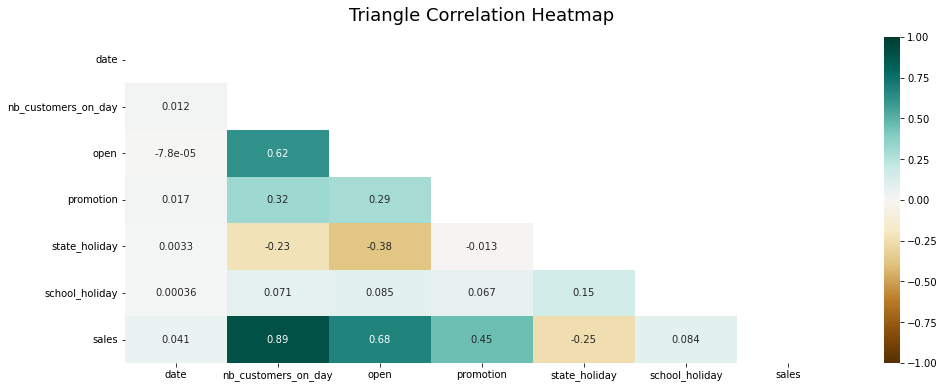

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(sales_date_num.corr(), dtype=np.bool))
heatmap = sns.heatmap(sales_date_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with Type')

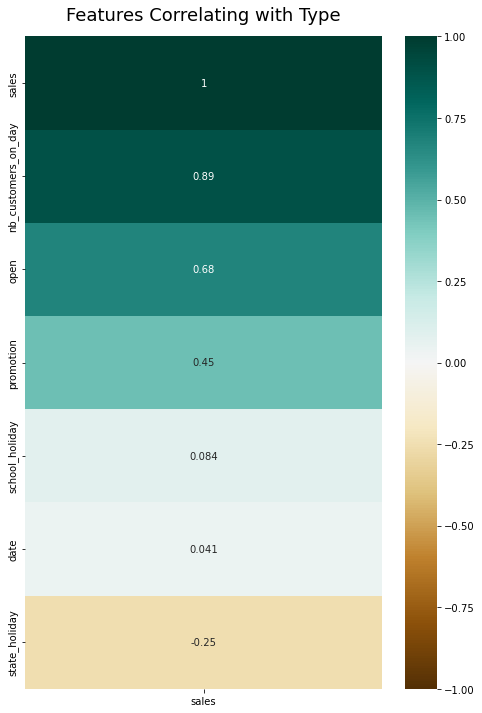

In [11]:
# Just checking the correlation with our target

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(sales_date_num.corr()[['sales']].sort_values(by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Type', fontdict={'fontsize':18}, pad=16)

In [12]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_date_num['sales']
X = sales_date_num.drop('sales',  axis=1)

# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.852461723295661
The rmse is:  1477.0267604598484


In [13]:
# We saw that school_holiday doesn't have a strong correlation to any of our features and target,
# So we will see if we get a better score without this column
sales_featsel = sales_date_num.drop(columns='school_holiday',axis=1)

In [14]:
# Instantiating a LinearRegression Model
model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_featsel['sales']
X = sales_featsel.drop('sales',  axis=1)

# Splitting the datasets into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8545506786533777
The rmse is:  1471.1537866948656


In [15]:
# So... even that school_holiday doesn't have a strong correlation, droping it makes our R^2 be lower
# Beacause of that we decided to keep it

In [16]:
# Also, before doing all of this we've run our model without any chances in our dataset (in other computer).
# The values obtained was:

# The r2 is:  0.8541070570089223
# The rmse is:  1470.1437494420563

# Conclusion so far: we needed to do some changes

In [17]:
sales_date_num.describe()

,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.00000,640840.000000,640840.000000
mean,735334.086967,633.398577,0.830185,0.381718,0.03071,0.178472,5777.469011
std,274.469985,464.094416,0.375470,0.485808,0.17253,0.382910,3851.338083
min,734869.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,735097.000000,405.000000,1.000000,0.000000,0.00000,0.000000,3731.000000
50%,735325.000000,609.000000,1.000000,0.000000,0.00000,0.000000,5746.000000
75%,735579.000000,838.000000,1.000000,1.000000,0.00000,0.000000,7860.000000
max,735810.000000,5458.000000,1.000000,1.000000,1.00000,1.000000,41551.000000


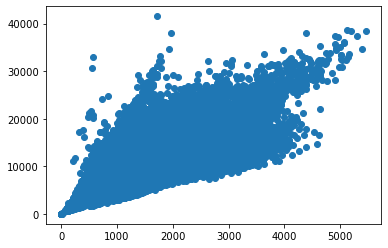

In [18]:
plt.scatter(sales_date_num['nb_customers_on_day'],sales_date_num['sales'])

In [19]:
# After talking to our TA we will check if treating our date column as a dummy variable wil bring better results

sales_date_dummy = sales.copy()

sales_date_dummy['year'] = pd.DatetimeIndex(sales_date_dummy['date']).year
sales_date_dummy['month'] = pd.DatetimeIndex(sales_date_dummy['date']).month
sales_date_dummy.drop(columns=('date'), axis=1,inplace=True)
sales_date_dummy.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month
0,366,4,517,1,0,0,0,4422,2013,4
1,394,6,694,1,0,0,0,8297,2015,4
2,807,4,970,1,1,0,0,9729,2013,8
3,802,2,473,1,1,0,0,6513,2013,5
4,726,4,1068,1,1,0,0,10882,2013,10


/var/folders/zl/64_yxwls4ld4zjxrnk6t2yth0000gn/T/ipykernel_1488/1986098010.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(sales_date_dummy.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

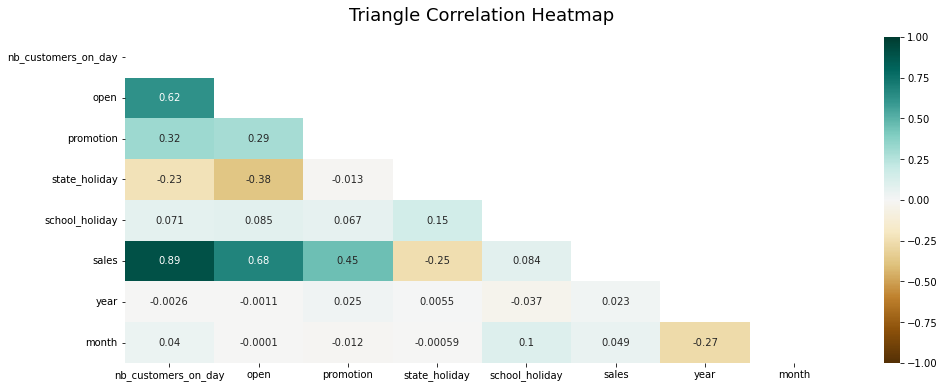

In [20]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(sales_date_dummy.corr(), dtype=np.bool))
heatmap = sns.heatmap(sales_date_dummy.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [21]:
sales_date_dummy.drop(columns=('year'),axis=1,inplace=True)

In [22]:
# Instantiating a LinearRegression Model
model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_date_dummy['sales']
X = sales_date_dummy.drop('sales',  axis=1)

# Splitting the datasets into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.853278972706956
The rmse is:  1476.8105635334214


In [23]:
categorical_features = ['month']
for col in categorical_features:
    dummies = pd.get_dummies(sales_date_dummy[col], prefix=col)
    sales_date_dummy = pd.concat([sales_date_dummy, dummies], axis=1)
    sales_date_dummy.drop(col, axis=1, inplace=True)
    
sales_date_dummy.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,366,4,517,1,0,0,0,4422,0,0,0,1,0,0,0,0,0,0,0,0
1,394,6,694,1,0,0,0,8297,0,0,0,1,0,0,0,0,0,0,0,0
2,807,4,970,1,1,0,0,9729,0,0,0,0,0,0,0,1,0,0,0,0
3,802,2,473,1,1,0,0,6513,0,0,0,0,1,0,0,0,0,0,0,0
4,726,4,1068,1,1,0,0,10882,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
# Instantiating a LinearRegression Model
model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_date_dummy['sales']
X = sales_date_dummy.drop('sales',  axis=1)

# Splitting the datasets into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8558842263886024
The rmse is:  1463.7600154432264


In [36]:
from sklearn.tree import DecisionTreeRegressor

clf_model = DecisionTreeRegressor( random_state=42, max_depth=3, min_samples_leaf=20)   
clf_model.fit(X_train, y_train)

y_predict = clf_model.predict(X_test)

r2 = r2_score(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8087475026317554
The rmse is:  1686.2333653594428


In [37]:
clf_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=20)   
clf_model.fit(X_train, y_train)

y_predict = clf_model.predict(X_test)

r2 = r2_score(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8558946921006827
The rmse is:  1463.7068652271714


In [38]:
clf_model = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_leaf=20)   
clf_model.fit(X_train, y_train)

y_predict = clf_model.predict(X_test)

r2 = r2_score(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8720505716544859
The rmse is:  1379.2192050989136


In [34]:
clf_model = DecisionTreeRegressor(criterion="gini", random_state=42, max_depth=8, min_samples_leaf=20)   
clf_model.fit(X_train, y_train)

y_predict = clf_model.predict(X_test)

r2 = r2_score(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8228051384161919
The rmse is:  1623.0790901763437


In [39]:
from sklearn.ensemble import RandomForestRegressor

rand_flor_reg = RandomForestRegressor(max_depth=3, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.814579245999816
The rmse is:  1660.325707648551


In [40]:
rand_flor_reg = RandomForestRegressor(max_depth=5, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8610710843432098
The rmse is:  1437.1776144457172


In [41]:
rand_flor_reg = RandomForestRegressor(max_depth=7, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8774338998638295
The rmse is:  1349.8928743165684


In [44]:
# After talking to our TA we will check if treating our date column as a dummy variable wil bring better results

sales_date = sales.copy()

sales_date['year'] = pd.DatetimeIndex(sales_date['date']).year
sales_date['month'] = pd.DatetimeIndex(sales_date['date']).month
sales_date.drop(columns=['date','year'], axis=1,inplace=True)
sales_date.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month
0,366,4,517,1,0,0,0,4422,4
1,394,6,694,1,0,0,0,8297,4
2,807,4,970,1,1,0,0,9729,8
3,802,2,473,1,1,0,0,6513,5
4,726,4,1068,1,1,0,0,10882,10


In [53]:
######## No month DUMMY!!!!!

# Instantiating a LinearRegression Model
model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_date['sales']
X = sales_date.drop(columns=['sales'],  axis=1)

# Splitting the datasets into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8518388788271197
The rmse is:  1483.6699063098254


In [46]:
clf_model = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_leaf=20)   
clf_model.fit(X_train, y_train)

y_predict = clf_model.predict(X_test)

r2 = r2_score(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8729427814707789
The rmse is:  1368.6729914610478


In [47]:
rand_flor_reg = RandomForestRegressor(max_depth=7, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8785532008136979
The rmse is:  1338.1138380079187


In [54]:
for i in range(2, 9):
    rand_flor_reg = RandomForestRegressor(max_depth=i, random_state=0)
    rand_flor_reg.fit(X_train, y_train)

    y_pred = rand_flor_reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f'The r2 {i} is: ', r2)
    print(f'The rmse {i} is: ', rmse)
    print('\n')


The r2 2 is:  0.7363578338613406
The rmse 2 is:  1979.1449183793925


The r2 3 is:  0.8150956066474284
The rmse 3 is:  1657.4627433598705


The r2 4 is:  0.8409530482111044
The rmse 4 is:  1537.208704500055


The r2 5 is:  0.8597014497680816
The rmse 5 is:  1443.7658053650557


The r2 6 is:  0.8698638007668429
The rmse 6 is:  1390.494320279926


The r2 7 is:  0.8777920384597795
The rmse 7 is:  1347.4724980454848


The r2 8 is:  0.8828750689529963
The rmse 8 is:  1319.1519812957758




In [55]:
rand_flor_reg = RandomForestRegressor(max_depth=9, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8872236932777292
The rmse is:  1294.4315625107924


In [56]:
rand_flor_reg = RandomForestRegressor(max_depth=10, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.892073375213059
The rmse is:  1266.2937335907143


In [57]:
rand_flor_reg = RandomForestRegressor(max_depth=10, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred_train = rand_flor_reg.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8949273393186967
The rmse is:  1248.14879367131


In [58]:
rand_flor_reg = RandomForestRegressor(max_depth=11, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

y_pred_train = rand_flor_reg.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print('The r2 is: ', r2, r2_train)
print('The rmse is: ', rmse, rmse_train)

The r2 is:  0.8976433687623048 0.9015217338777451
The rmse is:  1233.1847684632353 1208.3470696279103


In [62]:
rand_flor_reg = RandomForestRegressor(n_estimators=500, max_depth=11, random_state=0)
rand_flor_reg.fit(X_train, y_train)

y_pred = rand_flor_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

y_pred_train = rand_flor_reg.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print('The r2 is: ', r2, r2_train)
print('The rmse is: ', rmse, rmse_train)

The r2 is:  0.8978434359114104 0.9016348177557935
The rmse is:  1231.9789822036141 1207.6530899902225


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

for i in range(5,12):
    grad_boost_reg = GradientBoostingRegressor(max_depth=i, random_state=0)
    grad_boost_reg.fit(X_train, y_train)

    y_pred = grad_boost_reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    y_pred_train = grad_boost_reg.predict(X_train)
    
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    
    print('The r2 is: ', r2, r2_train)
    print('The rmse is: ', rmse, rmse_train)
    print('\n')


The r2 is:  0.9133446731622218 0.9149367862699581
The rmse is:  1134.6653488335294 1123.0326681382978


The r2 is:  0.9242233545911137 0.9261446036689
The rmse is:  1061.0548813631242 1046.4358576735349


The r2 is:  0.9335993227310645 0.9356198223009117
The rmse is:  993.2450618022564 977.0067900087223


The r2 is:  0.9435919317262955 0.9461704988791974
The rmse is:  915.4629523545032 893.3706365399486


The r2 is:  0.9515275145904454 0.9549613165231018
The rmse is:  848.6288740504983 817.1736233148213


The r2 is:  0.9576471663797942 0.9621348208877313
The rmse is:  793.2524023961205 749.2754517685356


The r2 is:  0.96313192008707 0.9690725506283486
The rmse is:  740.1085477790806 677.1635120777129


